In [53]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("viktor-cikojevic/three_d_seg")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })


In [54]:
df.head()   

,summary,config,name
0,"{'surface_dice': 0.8607127070426941, 'epoch': ...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet101_imagenet)-c512x1-bs32-llr-4...
1,"{'_runtime': 4359.221200466156, 'crude_val_los...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....
2,"{'crude_f1': 0, '_step': 1506, 'epoch': 0, 'th...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....
3,"{'threshold': 0.019999999552965164, 'train_los...","{'loss': [{'type': 'BCELoss', 'weight': 0.01},...",SMP(Unet_resnet101_imagenet)-c512x1-bs32-llr-3...
4,"{'epoch': 0, 'crude_f1': 0, 'f1_score': 0.2999...","{'loss': [{'type': 'BCELoss', 'weight': 0.11},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....


In [55]:
group_names = []
for i in range(len(df)):
    group_name = df.config.iloc[i]['group_name']
    group_names.append(group_name)
    
df['group_name'] = group_names

In [56]:
df

,summary,config,name,group_name
0,"{'surface_dice': 0.8607127070426941, 'epoch': ...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet101_imagenet)-c512x1-bs32-llr-4...,smp_unet_scan_model_size
1,"{'_runtime': 4359.221200466156, 'crude_val_los...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....,smp_unet_scan_model_size
2,"{'crude_f1': 0, '_step': 1506, 'epoch': 0, 'th...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_scan_model_size
3,"{'threshold': 0.019999999552965164, 'train_los...","{'loss': [{'type': 'BCELoss', 'weight': 0.01},...",SMP(Unet_resnet101_imagenet)-c512x1-bs32-llr-3...,smp_unet_scan_model_size
4,"{'epoch': 0, 'crude_f1': 0, 'f1_score': 0.2999...","{'loss': [{'type': 'BCELoss', 'weight': 0.11},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_r18_hyptun
...,...,...,...,...
58,"{'threshold': 0.20000000298023224, '_timestamp...","{'loss': [{'type': 'BCELoss', 'weight': 0.41},...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-2....,smp_unet_r50_hyptun
59,"{'epoch': 0, '_runtime': 9969.917870759964, 'c...","{'loss': [{'type': 'BCELoss', 'weight': 0.6100...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....,smp_unet_r50_hyptun
60,"{'f1_score': 0.018148032948374748, 'train_loss...","{'loss': [{'type': 'BCELoss', 'weight': 0.51},...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-2....,smp_unet_r50_hyptun
61,"{'_wandb': {'runtime': 3706}, 'lr-AdamW': 0.00...","{'loss': [{'type': 'BCELoss', 'weight': 0.01},...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....,smp_unet_r50_hyptun


In [57]:
df = df[df['group_name'] == 'smp_unet_scan_model_size']
df

,summary,config,name,group_name
0,"{'surface_dice': 0.8607127070426941, 'epoch': ...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet101_imagenet)-c512x1-bs32-llr-4...,smp_unet_scan_model_size
1,"{'_runtime': 4359.221200466156, 'crude_val_los...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....,smp_unet_scan_model_size
2,"{'crude_f1': 0, '_step': 1506, 'epoch': 0, 'th...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_scan_model_size
3,"{'threshold': 0.019999999552965164, 'train_los...","{'loss': [{'type': 'BCELoss', 'weight': 0.01},...",SMP(Unet_resnet101_imagenet)-c512x1-bs32-llr-3...,smp_unet_scan_model_size


In [58]:
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    if not isinstance(d, (dict, list)):
        # Return immediately if d is neither a dictionary nor a list
        return {parent_key: d}

    for k, v in d.items() if isinstance(d, dict) else enumerate(d):
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                items.extend(flatten_dict(item, f"{new_key}{sep}{i}", sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)


In [59]:
flat_configs = []
# loop over rows
for indx_row, row in df.iterrows():
    # Flatten the config   
    config = row['config']
    flat_config = flatten_dict(config)
    flat_configs.append(flat_config)

In [60]:
df = pd.DataFrame(flat_configs)
df.head()

,loss_0_type,loss_0_weight,loss_1_type,loss_1_weight,loss_2_type,loss_2_kwargs_smooth,loss_2_weight,loss_3_type,loss_3_kwargs_gamma,loss_3_weight,...,early_stopping_min_delta,batch_transform_kwargs_mixup_prob,batch_transform_kwargs_alpha_mixup,batch_transform_kwargs_cutmix_prob,batch_transform_kwargs_alpha_cutmix,experiment_name,quit_immediately,best_surface_dice,val_check_interval,apparent_batch_size
0,BCELoss,0.001,MccLoss,0.001,DiceLoss,0.0001,0.2,FocalLoss,2,0.3,...,0,0.3,0.4,0,0.4,SMP(Unet_resnet101_imagenet)-c512x1-bs32-llr-4...,False,0.868636,40000,32
1,BCELoss,0.001,MccLoss,0.001,DiceLoss,0.0001,0.2,FocalLoss,2,0.3,...,0,0.3,0.4,0,0.4,SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....,False,0.886719,40000,32
2,BCELoss,0.001,MccLoss,0.001,DiceLoss,0.0001,0.2,FocalLoss,2,0.3,...,0,0.3,0.4,0,0.4,SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,False,0.871051,40000,32
3,BCELoss,0.010,MccLoss,0.010,DiceLoss,0.0001,0.2,FocalLoss,2,0.3,...,0,0.3,0.4,0,0.4,SMP(Unet_resnet101_imagenet)-c512x1-bs32-llr-3...,False,0.875923,25000,32


In [61]:
for col in df.columns:
    if 'encoder' in col:
        print(col)

model_kwargs_encoder_name
model_kwargs_encoder_weights


In [62]:
for col in df.columns:
    if 'lr' in col:
        print(col)

optimiser_kwargs_lr
optimiser_log_lr


In [63]:
df = df[['model_kwargs_encoder_name', 'optimiser_log_lr', 'best_surface_dice']]
# remove resnet from name
df['encoder_size'] = df['model_kwargs_encoder_name'].str.replace('resnet', '').astype(int)
df

,model_kwargs_encoder_name,optimiser_log_lr,best_surface_dice,encoder_size
0,resnet101,-4.2,0.868636,101
1,resnet50,-3.7,0.886719,50
2,resnet18,-3.7,0.871051,18
3,resnet101,-3.7,0.875923,101


Text(0, 0.5, 'best surface dice')

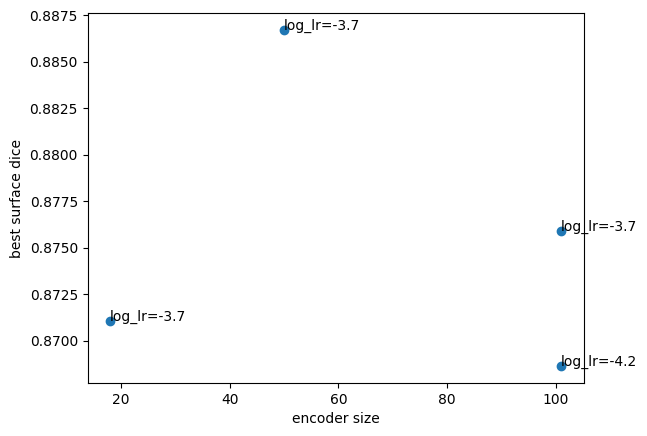

In [64]:
import matplotlib.pyplot as plt

plt.scatter(df['encoder_size'], df['best_surface_dice'])
# put optimiser_log_lr as text near each point
for i, txt in enumerate(df['optimiser_log_lr']):
    plt.annotate(f"log_lr={txt}", (df['encoder_size'][i], df['best_surface_dice'][i]))
    
plt.xlabel('encoder size')
plt.ylabel('best surface dice')